Salary Prediction

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Assuming 'MonthlyIncome' is the target variable
X = data.drop('MonthlyIncome', axis=1)  # Features
y = data['MonthlyIncome']  # Target variable

# Convert categorical variables to dummy/indicator variables (if needed)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_9696\3767945301.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


Mean Squared Error: 1944167203174201.8
R-squared: -103390581.0177867


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Assuming 'MonthlyIncome' is the target variable
X = data.drop('MonthlyIncome', axis=1)  # Features
y = data['MonthlyIncome']  # Target variable

# Extract relevant information from the date feature
X['DateOfjoiningintheCurrentCompany'] = pd.to_datetime(X['DateOfjoiningintheCurrentCompany'])
X['JoiningYear'] = X['DateOfjoiningintheCurrentCompany'].dt.year
X['JoiningMonth'] = X['DateOfjoiningintheCurrentCompany'].dt.month

# Drop the original date feature
X = X.drop('DateOfjoiningintheCurrentCompany', axis=1)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the entire dataset
all_predictions = model.predict(X)

# Add the predicted values to the original dataset
data['PredictedMonthlyIncome'] = all_predictions

# Print evaluation metrics
mse = mean_squared_error(y, all_predictions)
r2 = r2_score(y, all_predictions)
print(f'Mean Squared Error: {mse}')


# Print the predicted monthly income for all employees
print(data[['EmployeeID', 'MonthlyIncome', 'PredictedMonthlyIncome']])


C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_21352\1866506845.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


Mean Squared Error: 1138665.2809343927
R-squared: 0.9395772449693844
       EmployeeID  MonthlyIncome  PredictedMonthlyIncome
0              10           2670             3106.031914
1              15           4193             4740.726719
2              19           2028             2191.123505
3              21           3298             2413.302826
4              24           3944             2282.032899
...           ...            ...                     ...
50336        1590           8853             6551.855811
50337         565           2546             2783.559019
50338        1719          16704            16280.338302
50339         170           6567             6550.485556
50340         412           5661             5980.115667

[50341 rows x 3 columns]


C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_14100\2093183680.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


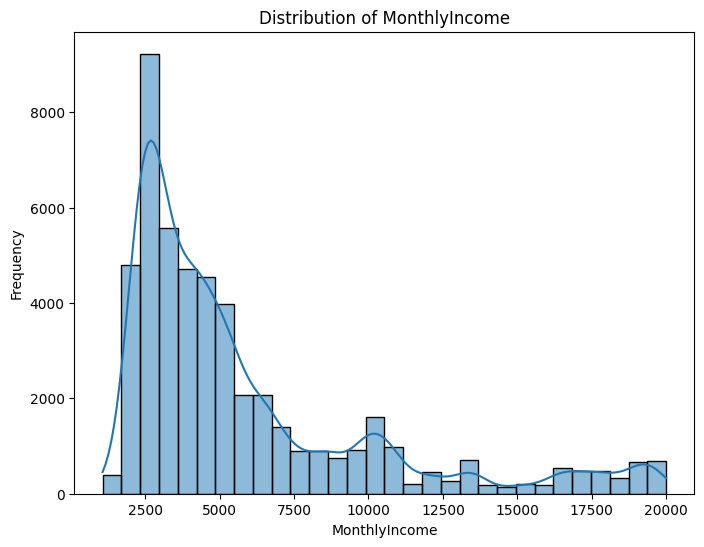

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Select only numeric columns for correlation matrix
numeric_data = data[numeric_columns]


# Histogram of 'MonthlyIncome'
plt.figure(figsize=(8, 6))
sns.histplot(data['MonthlyIncome'], bins=30, kde=True)
plt.title('Distribution of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()


Employee overime prediction

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Assuming 'istrain' is the target variable
X = data.drop('istrain', axis=1)  # Features
y = data['istrain']  # Target variable

# Extract relevant information from the date feature
X['DateOfjoiningintheCurrentCompany'] = pd.to_datetime(X['DateOfjoiningintheCurrentCompany'])
X['JoiningYear'] = X['DateOfjoiningintheCurrentCompany'].dt.year
X['JoiningMonth'] = X['DateOfjoiningintheCurrentCompany'].dt.month

# Drop the original date feature and other unnecessary columns
X = X.drop(['DateOfjoiningintheCurrentCompany', 'EmployeeID', 'Specialization', 'PerformanceRating', 'MaritalStatus'], axis=1)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Print the predicted overtime status for all employees
predictions = model.predict(X)

data['PredictedOvertime'] = predictions



print(data[['EmployeeID', 'istrain', 'PredictedOvertime']])



C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_11268\1174925933.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9986095477719659
Confusion Matrix:
[[ 2962    10]
 [   11 12120]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2972
           1       1.00      1.00      1.00     12131

    accuracy                           1.00     15103
   macro avg       1.00      1.00      1.00     15103
weighted avg       1.00      1.00      1.00     15103

       EmployeeID  istrain  PredictedOvertime
0              10        1                  1
1              15        1                  1
2              19        1                  1
3              21        1                  1
4              24        1                  1
...           ...      ...                ...
50336        1590        0                  0
50337         565        0                  0
50338        1719        0                  0
50339         170        0                  0
50340         412        0                  0

[50341 rows x 3 col

In [8]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Assuming 'istrain' is the target variable
X = data.drop('istrain', axis=1)  # Features
y = data['istrain']  # Target variable

# Extract relevant information from the date feature
X['DateOfjoiningintheCurrentCompany'] = pd.to_datetime(X['DateOfjoiningintheCurrentCompany'])
X['JoiningYear'] = X['DateOfjoiningintheCurrentCompany'].dt.year
X['JoiningMonth'] = X['DateOfjoiningintheCurrentCompany'].dt.month

# Drop the original date feature and other unnecessary columns
X = X.drop(['DateOfjoiningintheCurrentCompany', 'EmployeeID', 'Specialization', 'PerformanceRating', 'MaritalStatus'], axis=1)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{classification_rep}')

# Print the predicted overtime status for all employees
predictions = model.predict(X)

# Add the predicted overtime status to the original DataFrame
data['PredictedOvertime'] = predictions

# Count all the values where PredictedOvertime is equal to 1
count_predicted_overtime = data['PredictedOvertime'].value_counts().get(1, 0)

print(f'Total count where PredictedOvertime is equal to 1: {count_predicted_overtime}')


C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_11268\458486502.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Total count where PredictedOvertime is equal to 1: 40305


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('dataset.csv')

# Assuming 'Happynesslevelinjob' is the target variable
X = data[['Joblevel', 'DistancetoHome', 'OfficeAmbienceRating', 'MonthlyRate',
          'YearsSinceLastPromotion', 'SelfMotivationRating', 'Age',
          'YearsInCurrentRole', 'NumberofCompaniesChanged', 'WorkLifeBalance',
          'Emolumnet_in_Pecentage', 'DialyRate', 'MonthlyIncome']]

y = data['Happynesslevelinjob']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Now, you can use the trained model to predict 'Happynesslevelinjob' for new data
# For example, if you have a new set of features in a DataFrame called 'new_data':
# new_predictions = model.predict(new_data[['Joblevel', 'DistancetoHome', ...]])

# Note: Customize the code based on your specific dataset and requirements.


Mean Squared Error: 0.9046735965738888
R-squared: 0.05702708475857754


C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_11268\1088629669.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


Happiness level prediction

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Assuming 'Happynesslevelinjob' is the target variable
X = data[['Joblevel', 'DistancetoHome', 'OfficeAmbienceRating', 'MonthlyRate',
          'YearsSinceLastPromotion', 'SelfMotivationRating', 'Age',
          'YearsInCurrentRole', 'NumberofCompaniesChanged', 'WorkLifeBalance',
          'Emolumnet_in_Pecentage', 'DialyRate', 'MonthlyIncome']]

y = data['Happynesslevelinjob']

# Convert categorical variables to dummy/indicator variables (if needed)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')




C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_14100\4224246282.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


Accuracy: 0.9368358327539974
Confusion Matrix:
[[1471   65   12    3]
 [  64 1808  151   39]
 [  17  135 4010   52]
 [   8   37   53 2144]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.95      0.95      1551
           2       0.88      0.88      0.88      2062
           3       0.95      0.95      0.95      4214
           4       0.96      0.96      0.96      2242

    accuracy                           0.94     10069
   macro avg       0.93      0.93      0.93     10069
weighted avg       0.94      0.94      0.94     10069



Generating CSV

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('dataset.csv')

# Assuming 'Happynesslevelinjob' is the target variable
X = data[['Joblevel', 'DistancetoHome', 'OfficeAmbienceRating', 'MonthlyRate',
          'YearsSinceLastPromotion', 'SelfMotivationRating', 'Age',
          'YearsInCurrentRole', 'NumberofCompaniesChanged', 'WorkLifeBalance',
          'Emolumnet_in_Pecentage', 'DialyRate', 'MonthlyIncome']]

y = data['Happynesslevelinjob']

# Convert categorical variables to dummy/indicator variables (if needed)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a DataFrame to store actual and predicted 'Happynesslevelinjob' values
result_df = pd.DataFrame({'Actual_Happiness_Level': y_test, 'Predicted_Happiness_Level': y_pred})

# Save the DataFrame to a CSV file
result_df.to_csv('happiness_predictions.csv', index=False)

# Print the results
print(result_df)



C:\Users\Syed Fraz\AppData\Local\Temp\ipykernel_14100\526710165.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


       Actual_Happiness_Level  Predicted_Happiness_Level
34859                       4                          4
24263                       1                          1
28019                       4                          4
11461                       3                          3
12287                       3                          3
...                       ...                        ...
46781                       4                          4
13912                       3                          3
17621                       4                          4
27947                       1                          1
21622                       1                          1

[10069 rows x 2 columns]
